# Main Library

In [1]:
# Reading Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing Data
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.utils import to_categorical

# Building Machine Learning Model 
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
import xgboost as xgb

# Building Deep Learning Model
import tensorflow as tf 
# import tensorflow_decision_forests as tfdf
import tensorflow.keras as k
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

## Reading Data

In [2]:
data_train = pd.read_csv(r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Competitions\spaceship-titanic\train.csv")
data_train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
data_test = pd.read_csv(r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Competitions\spaceship-titanic\test.csv")
test_id = data_test["PassengerId"]
data_test.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [4]:
data_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [5]:
def remove_col(data):
    data = data.drop(columns=["PassengerId", "Name"], axis=1)
    return data

train = remove_col(data_train)
test = remove_col(data_test)

In [6]:
train.head(5)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [7]:
train["Destination"].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [8]:
def Make_Fill(data):
    for col in data.columns:
        if data[col].dtype == "O":
            data[col] = data[col].fillna(data[col].value_counts().index[0])
        else: data[col] = data[col].fillna(data[col].median())
    return data
            
train = Make_Fill(train)
test = Make_Fill(test)

In [9]:
def Make_preprocess(data):
    for i in range(data.shape[0]):
        data["Cabin"].iloc[i] = data["Cabin"].iloc[i][0] + data["Cabin"].iloc[i][-1]
    return data
train = Make_preprocess(train)
test = Make_preprocess(test)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
train.head(5)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,BP,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,FS,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,AS,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,AS,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,FS,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


## Make Encoder ==> Data (Label - OneHot)

In [11]:
def Label_Encoder(data):
    object_data = data.select_dtypes(include = ["object", "bool"])
    la = LabelEncoder()
    for col in object_data.columns:
        data[col] = la.fit_transform(data[col])
    return data

train = Label_Encoder(train)
test = Label_Encoder(test)
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,11,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,1,0,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,1,0,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0,0,11,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1


## OneHotEncoder

In [13]:
# def Make_OneHotEncoder(data):
    
#     object_element = data.select_dtypes(include=["object", "bool"])
#     la = LabelEncoder()
#     for col in object_element.columns:
#         if col in ["CryoSleep", "Cabin", "VIP", "Transported"]:
#             data[col] = la.fit_transform(data[col])
#             continue

#         else:
#             x = data[col].unique()
#             y = data[col].values
#             new_col = OneHotEncoder().fit_transform(y.reshape(-1, 1)).toarray()
#             for i, j in enumerate(x):
#                 data[x] = new_col[i]
                

#             data = data.drop(columns=col, axis=1)

#     return data

# train = Make_OneHotEncoder(train)
# test = Make_OneHotEncoder(test)
# train.head()

In [14]:
test.head(5)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,1,13,2,27.0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,11,2,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,1,1,5,0,31.0,0,0.0,0.0,0.0,0.0,0.0
3,1,0,5,2,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,0,0,11,2,20.0,0,10.0,0.0,635.0,0.0,0.0


## Make Visualization

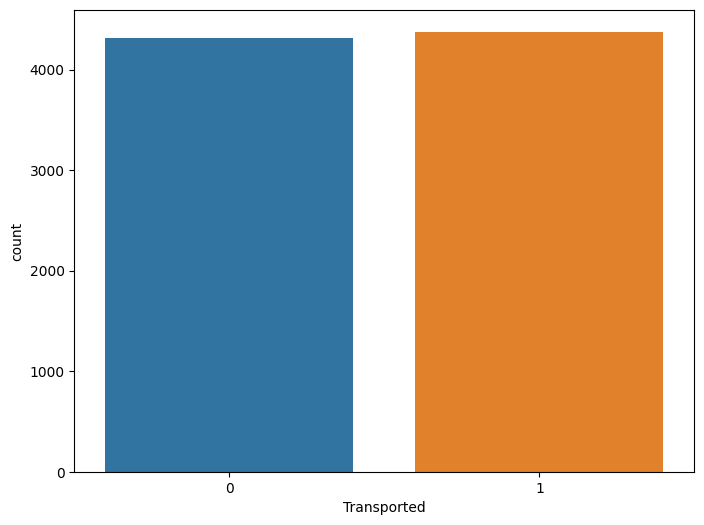

In [15]:
plt.figure(figsize=(8 , 6))
sns.countplot(x=train["Transported"])
plt.show()

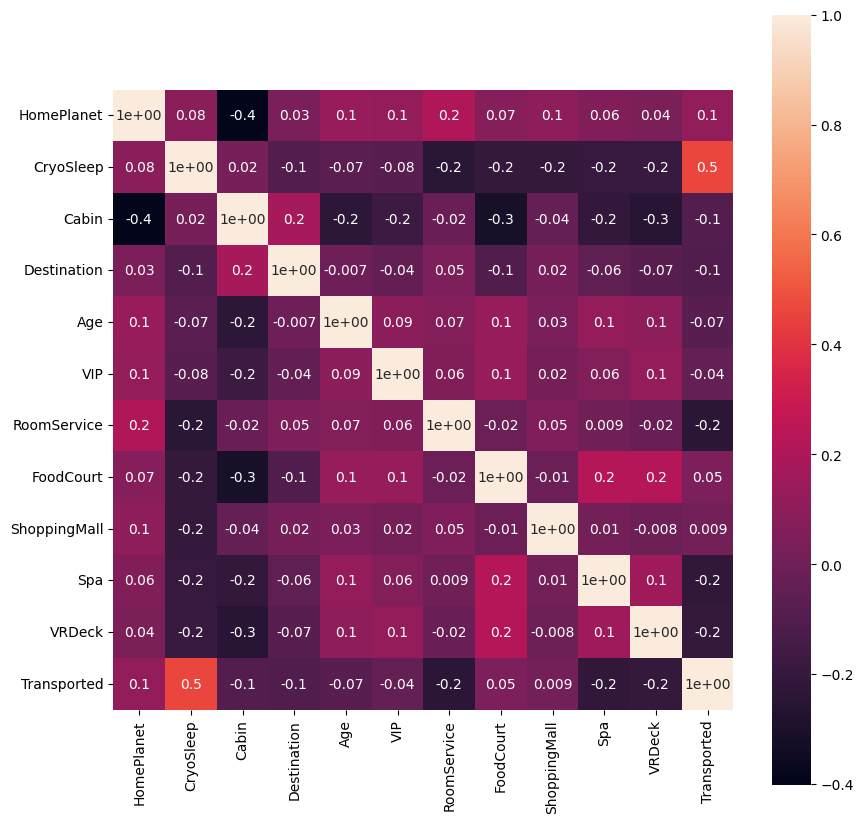

In [16]:
plt.figure(figsize=(10 , 10))
sns.heatmap(train.corr(), fmt="0.1", annot=True, square=True)
plt.show()

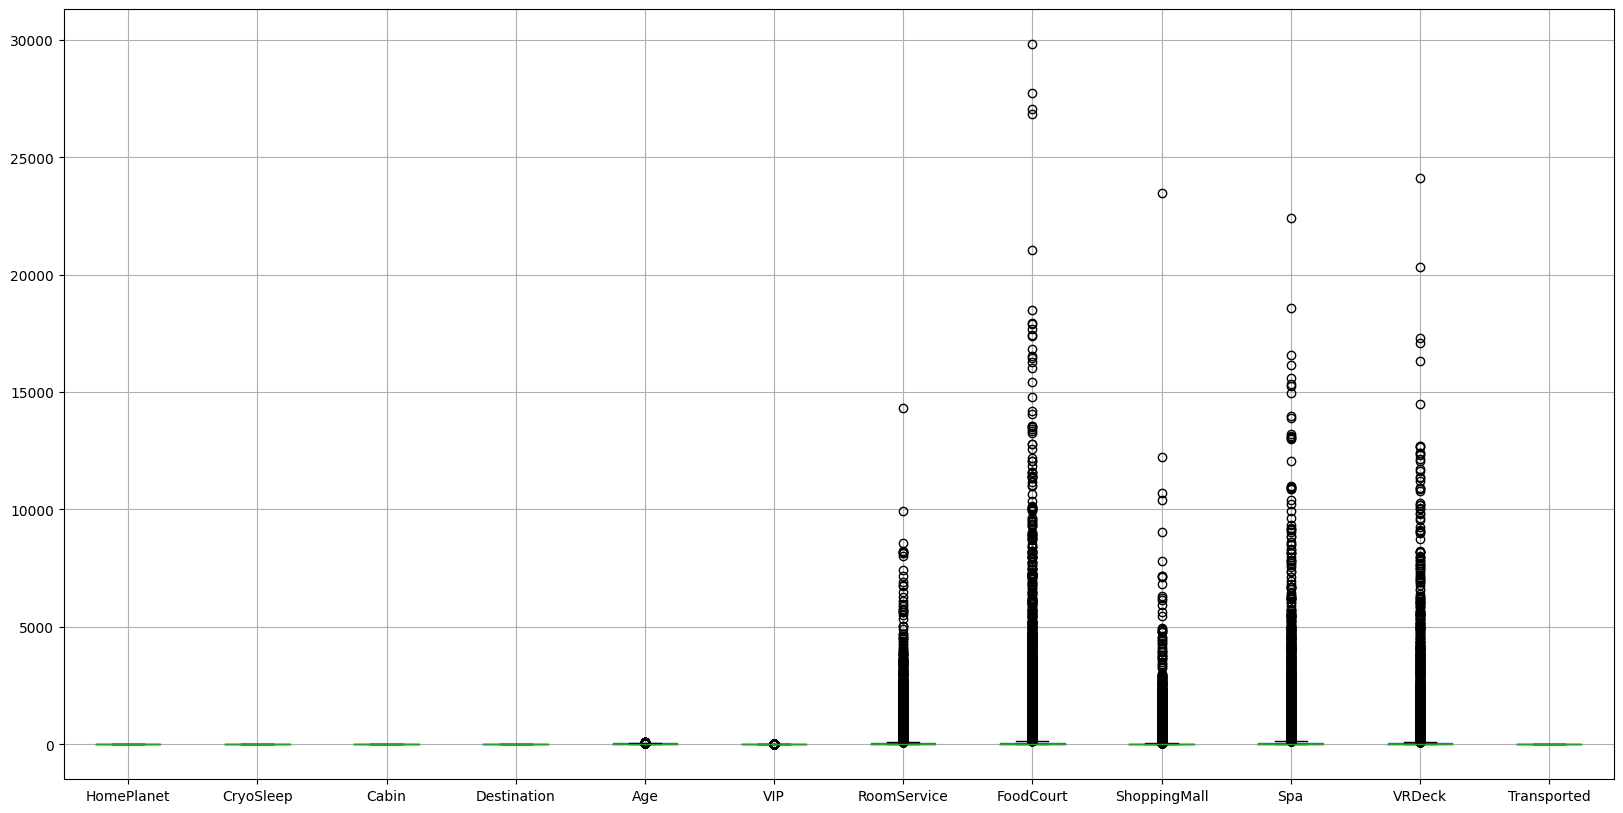

In [17]:
train.boxplot(figsize=(20, 10));

In [18]:
# Drop This Row Becouse This outlair 
train.drop(train[train["RoomService"]>20000].index, axis=0, inplace=True)
train.drop(train[train["FoodCourt"]>20000].index, axis=0, inplace=True)
train.drop(train[train["ShoppingMall"]>20000].index, axis=0, inplace=True)
train.drop(train[train["Spa"]>20000].index, axis=0, inplace=True)
train.drop(train[train["VRDeck"]>20000].index, axis=0, inplace=True)

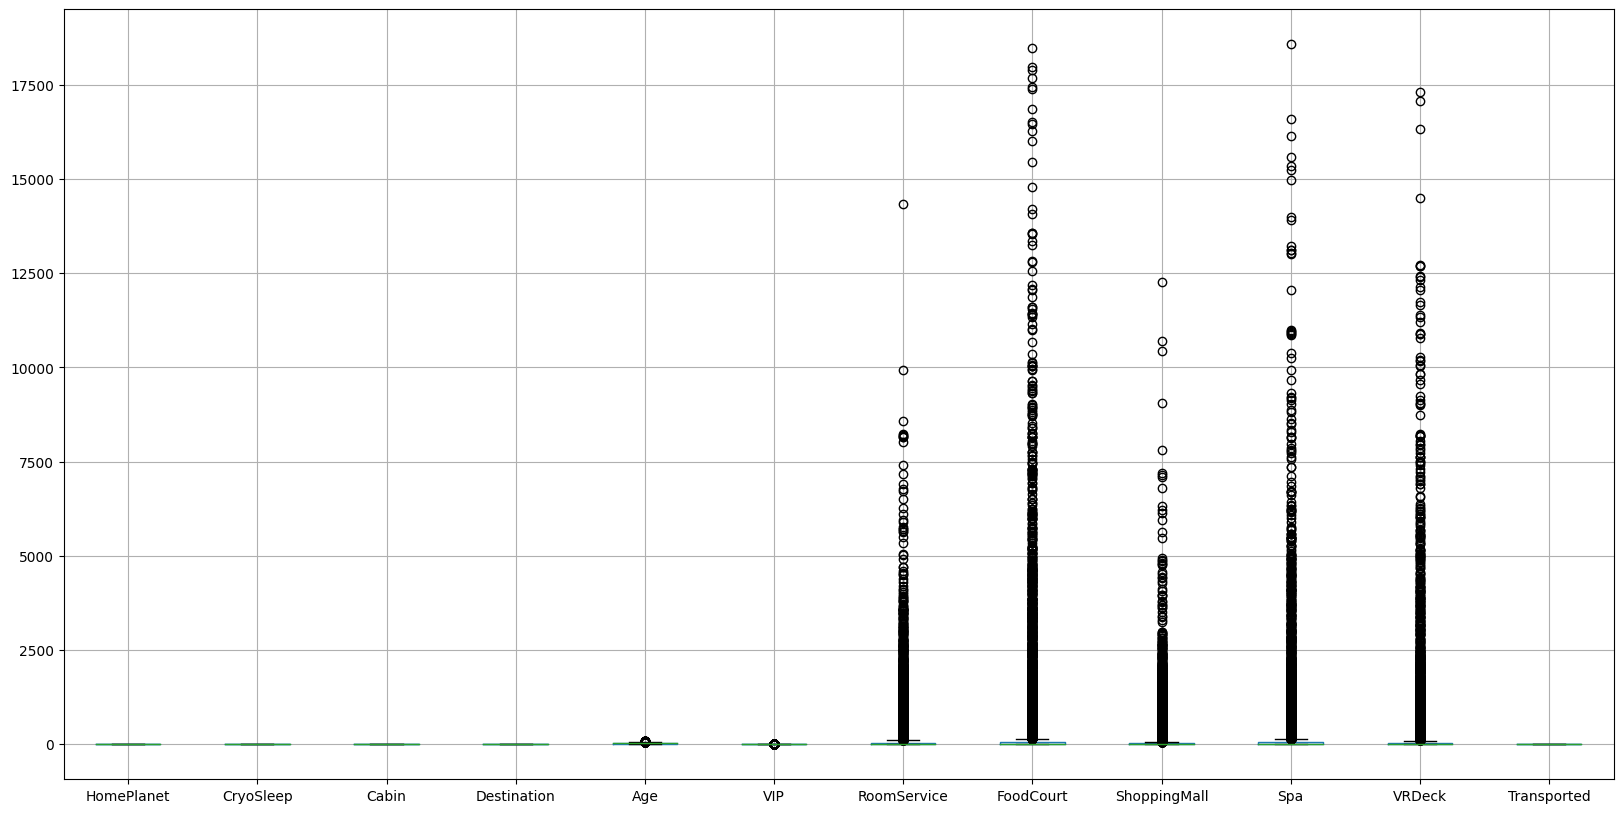

In [19]:
train.boxplot(figsize=(20, 10));

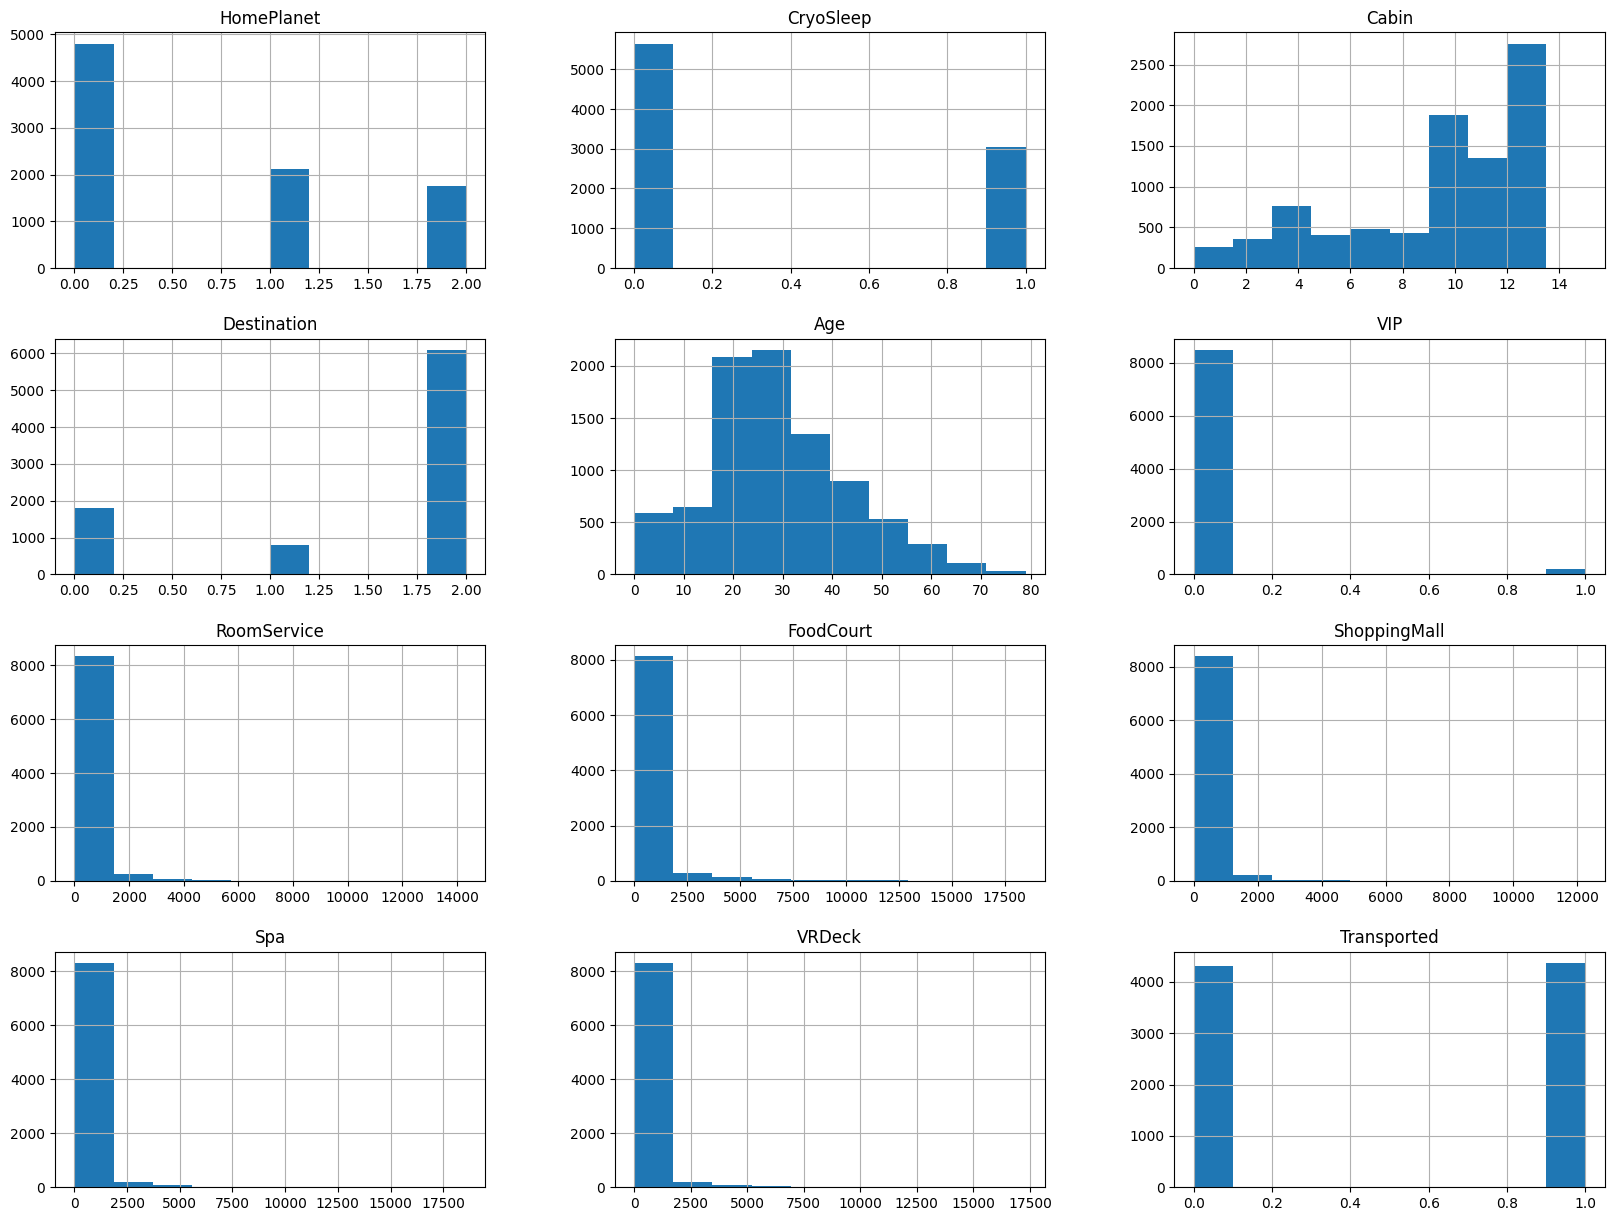

In [20]:
train.hist(figsize=(20, 15));

In [21]:
train.head(5)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,11,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,1,0,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,1,0,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0,0,11,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1


# Building ML Model

In [39]:
X = train.drop(columns="Transported", axis=1)
Y = train["Transported"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9, random_state=42)

### 1 - LogisticRegression

In [40]:
model_LR = LogisticRegression(max_iter=2000)
model_LR.fit(x_train, y_train)

print("The Accuracy SCore of Train Data is ", model_LR.score(x_train, y_train))
print("The Accuracy SCore of Test Data is ", model_LR.score(x_test, y_test))

The Accuracy SCore of Train Data is  0.7710812539987204
The Accuracy SCore of Test Data is  0.7560414269275029


### 2 - RandomForest

In [42]:
model_RF = RandomForestClassifier(n_estimators=1000, max_depth=100)
model_RF.fit(x_train, y_train)

print("The Accuracy SCore of Train Data is ", model_RF.score(x_train, y_train))
print("The Accuracy SCore of Test Data is ", model_RF.score(x_test, y_test))

The Accuracy SCore of Train Data is  0.9471529110684581
The Accuracy SCore of Test Data is  0.7882623705408516


In [26]:
# MAke Hyper_parameter In LogisticRegression
param2 = {"n_estimators": np.arange(10, 20, 1),
         "max_depth": np.arange(10, 16, 1),
         "min_samples_split": np.arange(2,6),
         "min_samples_leaf": np.arange(2,6)}

new_model_RF = GridSearchCV(estimator=RandomForestClassifier(), 
                             param_grid=param2, 
                             verbose=6,
                             cv=5, n_jobs=-1)
new_model_RF.fit(x_train, y_train)

print(f"The predict Score Train is ==> {new_model_RF.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {new_model_RF.score(x_test, y_test)}")

Fitting 5 folds for each of 960 candidates, totalling 4800 fits
The predict Score Train is ==> 0.8530766699572228
%----------------------------------------------------------%
The predict Score Test is ==> 0.8004604758250192


### 3 - AdaBoost Classifier

In [52]:
Adaboost_cls = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10),
                              n_estimators=100,
                              learning_rate=0.001)


Adaboost_cls.fit(x_train, y_train)

print(f"The predict Score Train is ==> {Adaboost_cls.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {Adaboost_cls.score(x_test, y_test)}")

The predict Score Train is ==> 0.8762635956493922
%----------------------------------------------------------%
The predict Score Test is ==> 0.7710011507479861


### 4 - XGBClassifier

In [55]:
model_xgb = xgb.XGBClassifier(n_estimators=1000, max_depth=10,reg_alpha=5,
                             learning_rate=0.04)

model_xgb.fit(x_train, y_train)

print(f"The predict Score Train is ==> {model_xgb.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {model_xgb.score(x_test, y_test)}")

The predict Score Train is ==> 0.8835572616762636
%----------------------------------------------------------%
The predict Score Test is ==> 0.7997698504027618


In [29]:
# MAke Hyper_parameter In LogisticRegression
param3 = {"n_estimators": np.arange(10, 20, 1),
          "max_depth": np.arange(10, 100, 5),
          "reg_alpha" : np.arange(1, 5, 1)}

new_model_xgb = GridSearchCV(estimator=xgb.XGBClassifier(), 
                             param_grid=param3, 
                             verbose=6,
                             cv=5, n_jobs=-1)

new_model_xgb.fit(x_train, y_train)

print(f"The predict Score Train is ==> {new_model_xgb.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {new_model_xgb.score(x_test, y_test)}")

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
The predict Score Train is ==> 0.8543928923988154
%----------------------------------------------------------%
The predict Score Test is ==> 0.7966231772831927


## Building DL Model

In [30]:
model_DL = Sequential(
    [
        Dense(128, activation="tanh"),
        Dense(64, activation="relu"),
        Dense(32, activation="sigmoid"),
        Dense(8, activation="tanh"),
        Dense(1, activation="sigmoid")
    ])
model_DL.compile(optimizer="adam", 
                loss=tf.keras.losses.binary_crossentropy, 
                metrics=tf.metrics.binary_accuracy)
model_DL.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), validation_split=0.2)

Epoch 1/20
190/190 [==============================] - 1s 2ms/step - loss: 0.5677 - binary_accuracy: 0.7261 - val_loss: 0.4949 - val_binary_accuracy: 0.7721
Epoch 2/20
190/190 [==============================] - 0s 2ms/step - loss: 0.4979 - binary_accuracy: 0.7702 - val_loss: 0.4826 - val_binary_accuracy: 0.7840
Epoch 3/20
190/190 [==============================] - 0s 2ms/step - loss: 0.4864 - binary_accuracy: 0.7746 - val_loss: 0.4751 - val_binary_accuracy: 0.7805
Epoch 4/20
190/190 [==============================] - 0s 1ms/step - loss: 0.4790 - binary_accuracy: 0.7804 - val_loss: 0.4722 - val_binary_accuracy: 0.7820
Epoch 5/20
190/190 [==============================] - 0s 1ms/step - loss: 0.4745 - binary_accuracy: 0.7830 - val_loss: 0.4706 - val_binary_accuracy: 0.7820
Epoch 6/20
190/190 [==============================] - 0s 1ms/step - loss: 0.4681 - binary_accuracy: 0.7846 - val_loss: 0.4614 - val_binary_accuracy: 0.7843
Epoch 7/20
190/190 [==============================] - 0s 1ms/ste

# Prediction

In [56]:
prediction = model_xgb.predict(test)
new_predit = []

for i in prediction:
    if i == 1: new_predit.append("True")
    else: new_predit.append("False")
        
submition = pd.DataFrame({"PassengerId": test_id, 
                          "Transported": new_predit})

In [57]:
submition.to_csv(r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Competitions\spaceship-titanic\submition.csv", index=False)

In [58]:
submition.head(5)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
